Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/N

,Price
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74
2017-08-28,166.32
2017-08-29,167.24


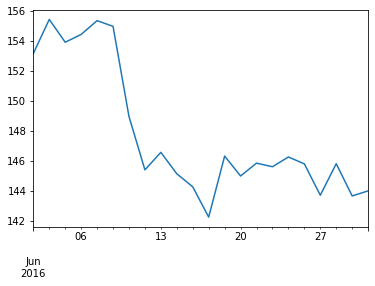

In [90]:
#-------------DatetimeIndex and Resample-------------------------
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

df = pd.read_csv("aapl.csv",parse_dates=["Date"], index_col="Date")
df.head(2)

df.index

df['2017-06-30']

df["2017-01"] 
df['2017-06'].head()
df['2017-06'].Close.mean()

df['2017'].head(2)

df['2017-01-08':'2017-01-03'] 
df['2017-01']
df['Close'].resample('M').mean().head()	# M : month end frequency 
df['2016-07']
%matplotlib inline 
df['Close'].plot()

df['Close'].resample('M').mean().plot()#kind='bar')

#--------------Date range------------------
import pandas as pd
df = pd.read_csv("aapl_no_dates.csv") # compare with aapl_2.csv df.head()
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B') # B: business day
rng

df.set_index(rng, inplace=True) # inplace = true: create a new dataframe df.head()

daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D') # D: calendar day
daily_index 
daily_index.difference(df.index)
%matplotlib inline 
df.Close.plot()

df["2016-06-01":"2016-06-10"].Close.mean()

df.index
df.asfreq('D',method='pad') # asfreq: Convert TimeSeries to specified frequency. 
df.asfreq('W',method='pad')
# method='pad': Method to use for filling holes in reindexed Series 
df.asfreq('H',method='pad')
rng = pd.date_range('1/1/2011', periods=72, freq='H') 
rng

import numpy as np
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
# np.random.randint(0,10,len(rng): from 0 to 10, the number of len(rng) 
ts.head(20)

#-----------------Holidays--------------
import pandas as pd
df = pd.read_csv("aapl_no_dates_2.csv") # compare with aapl_3.csv 
df.head()
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')

rng

from pandas.tseries.holiday import USFederalHolidayCalendar 
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal) 
rng

df.set_index(rng,inplace=True) 
df.head()

from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar): rules = [
Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
]
my_bday = CustomBusinessDay(calendar=myCalendar()) 
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

egypt_weekdays = "Sun Mon Tue Wed Thu"
b = CustomBusinessDay(weekmask=egypt_weekdays) 
pd.date_range(start="7/1/2017",periods=20,freq=b)

b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)
pd.date_range(start="7/1/2017",periods=20,freq=b)

#-------------to_datetime: process different date format--------------
import pandas as pd
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016',
'2017.01.05', '2017/01/05','20170105']

pd.to_datetime(dt) 
pd.to_datetime('30-12-2016')
pd.to_datetime('5-1-2016', dayfirst=True)

pd.to_datetime('2017$01$05', format='%Y$%m$%d') # $: delimiter; format: yy-mm-dd

pd.to_datetime('2017#01#05', format='%Y#%m#%d') # #: delimiter; format: yy-mm-dd

pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore') # 'abc' : intentional error

pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

# Epoch or Unix time means number of seconds that have passed since Jan 1, 1970 00:00:00 UTC time 
# epoch converter: https://www.epochconverter.com/
current_epoch = 1594833926 
pd.to_datetime(current_epoch, unit='s')
pd.to_datetime(current_epoch*1000, unit='ms')
t = pd.to_datetime([current_epoch], unit='s')
t 
t.view('int64')
#----------------.Period and PeriodIndex-------------- 
import pandas as pd 
y = pd.Period('2016')
y # A-DEC: A: annual 
y.start_time
y.end_time

y.is_leap_year

m = pd.Period('2017-12') 
m

m.start_time

m.end_time

m+1

d = pd.Period('2016-02-28', freq='D') 
d

d.start_time 
d.end_time 
d+1
h = pd.Period('2017-08-15 23:00:00',freq='H')
h 
h+1
h+pd.offsets.Hour(1) # Achieve same results using pandas offsets hour

q1= pd.Period('2017Q1', freq='Q-JAN') # Q: quarter q1

q1.start_time 
q1.end_time

q1.asfreq('M',how='start')

q1.asfreq('M',how='end')

w = pd.Period('2017-07-05',freq='W') # w: week w

w-1

w2 = pd.Period('2017-08-15',freq='W') 
w2

w2-w

r = pd.period_range('2011', '2017', freq='q') 
r

r[0].start_time 
r[0].end_time
r = pd.period_range('2011', '2017', freq='q-jan') 
r

r[0].start_time 
r[0].end_time
import numpy as np 
idx = r
ps = pd.Series(np.random.randn(len(idx)), idx) # idx: Error ps

ps['2016']

ps['2016':'2017']

pst = ps.to_timestamp() 
pst

pst.index

ps = pst.to_period() 
ps

ps.index

import pandas as pd 
df = pd.read_csv("wmt.csv") 
df

df.set_index("Line Item",inplace=True) 
df = df.T # T: transpose
df

df.index = pd.PeriodIndex(df.index, freq="Q-JAN") # Change object to "Q-JAN"
df 
df.index

df.index[0].start_time

df["Start Date"]=df.index.map(lambda x: x.start_time) 
df

df["End Date"]=df.index.map(lambda x: x.end_time) 
df

#--------------------Timezone Handling----------------------
import pandas as pd
df = pd.read_csv("msft.csv", header=1,index_col='Date Time',parse_dates=True) # header = 1: infer 2nd line
df

df.index

df.tz_localize(tz='US/Eastern') 
df

df.index = df.index.tz_localize(tz='US/Eastern') 
df.index

df = df.tz_convert('Europe/Berlin') 
df

df.index


from pytz import all_timezones 
print (all_timezones)
df.index = df.index.tz_convert('Asia/Calcutta')
#df.index = df.index.tz_localize('Asia/Calcutta') 
# tz database doesn't have any Mumbai timezone but calcutta and mumbai are both in same timezone so we will use that
df


london = pd.date_range('3/6/2012 00:09:00', periods=10, freq='H',tz='Europe/London')

london
td = pd.date_range('3/6/2012 00:00', periods=10, freq='H',tz='dateutil/Europe/London')
td

rng = pd.date_range(start="2017-08-22 09:00:00",periods=10, freq='30min') 
s = pd.Series(range(10),index=rng)
s

b = s.tz_localize(tz="Europe/Berlin") 
b

b.index

m = s.tz_localize(tz="Asia/Calcutta") 
m.index

m

b + m

#-----------Timezone Handling--------------------
import pandas as pd
df = pd.read_csv("fb.csv",parse_dates=['Date'],index_col='Date') 
df

df.shift(1) 
df.shift(-1)

df['Prev Day Price'] = df['Price'].shift(1) 
df

df['Price Change'] = df['Price'] - df['Prev Day Price']

df


df['5 day return'] = (df['Price'] - df['Price'].shift(5))*100/df['Price'].shift(5) 
df

df = df[['Price']] 
df

df.index

df.index = pd.date_range(start='2017-08-15',periods=10, freq='B') 
df

df.index

# Shift the time index, using the index’s frequency if available.
df.tshift(1)

